In [138]:
martini2 = [10000,40000,28000,18000,20000,11000,60000,60000,60000,60000,40000,40000,60000,60000,60000
,60000,40000,40000,60000,60000,60000,60000,60000, 60000]
K_boltzmann = [5314,45035,8115,8640,9281,13790,31682,37745,29957,43397,30668,29205,29673,36885,31241
,44528,29429,31683,37886,31663,36768,37640,35433,42459]

In [5]:
distribution_data = [0.407856452,0.240748875,0.342813271,0.330018626,0.34436424,0.329832854,
                     0.232498218,0.268874918,0.294515549,0.163374159,0.329071584,0.341255349,
                     0.295453715,0.292897655,0.290967457,0.163283959,0.389641284,0.339721008,
                     0.223735452,0.28604885,0.267558318,0.221132278,0.268894032,0.209694821]
boltzmann_dist_data = [0.402,0.241,0.34,0.334,0.344,0.33,0.233,0.269,0.294,0.163,0.32956564,
                       0.340712528,0.295419276,0.292574026,0.290942967,0.163237596,0.389414705,
                       0.3398473,0.224364825,0.286736736,0.267010376,0.221585137,0.268910291,0.209924788]
import numpy as np
np.corrcoef(distribution_data, boltzmann_dist_data)

array([[1.        , 0.99971051],
       [0.99971051, 1.        ]])

In [2]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

In [3]:
distance_dict = dict.fromkeys(['BB1_BB2','BB2_BB3','BB3_ASC1','ASC2_ASC4','ASC1_ASC3','ASC1_ASC2','ASC2_ASC3','ASC3_ASC4',\
'ASC4_ASC1','BB3_USC1','USC1_USC2','USC2_USC3','USC3_USC1','BB3_GSC1','GSC2_GSC4','GSC1_GSC3','GSC1_GSC2','GSC2_GSC3',\
'GSC3_GSC4','GSC4_GSC1','BB3_CSC1','CSC1_CSC2','CSC2_CSC3','CSC3_CSC1'])

In [4]:
def return_modes_of_data(data):   
    data = data
    n = np.histogram(data)
    count_dict = {}
    for i in range(0,len(n[0])):
        count_dict[n[0][i]] = n[1][i]
    return sorted(count_dict.items()),data.mean()

In [5]:
# df_Hmapped_distance_7w0f = pd.read_csv('piRNA_simu_files/3O3I/dist_final.xvg')
df_Hmapped_distance_all = pd.read_csv('dist_final_allmolecules.xvg')

In [6]:
# 1rpu  1si3  2f8s  3cz3  4ngd  4nh3  5n8l  6bjv  6ra4  7w0f
BB1_BB2_Hmapped_distance_all = df_Hmapped_distance_all['BB1_BB2']
BB2_BB3_Hmapped_distance_all = df_Hmapped_distance_all['BB2_BB3']
BB3_ASC1_Hmapped_distance_all = df_Hmapped_distance_all['BB3_ASC1']
BB3_USC1_Hmapped_distance_all = df_Hmapped_distance_all['BB3_USC1']
BB3_GSC1_Hmapped_distance_all = df_Hmapped_distance_all['BB3_GSC1']
BB3_CSC1_Hmapped_distance_all = df_Hmapped_distance_all['BB3_CSC1']
ASC1_ASC2_Hmapped_distance_all = df_Hmapped_distance_all['ASC1_ASC2']
ASC2_ASC3_Hmapped_distance_all = df_Hmapped_distance_all['ASC2_ASC3']
ASC3_ASC4_Hmapped_distance_all = df_Hmapped_distance_all['ASC3_ASC4']
ASC4_ASC1_Hmapped_distance_all = df_Hmapped_distance_all['ASC4_ASC1']
ASC2_ASC4_Hmapped_distance_all = df_Hmapped_distance_all['ASC2_ASC4']
ASC1_ASC3_Hmapped_distance_all = df_Hmapped_distance_all['ASC1_ASC3']
GSC1_GSC2_Hmapped_distance_all = df_Hmapped_distance_all['GSC1_GSC2']
GSC2_GSC3_Hmapped_distance_all = df_Hmapped_distance_all['GSC2_GSC3']
GSC3_GSC4_Hmapped_distance_all = df_Hmapped_distance_all['GSC3_GSC4']
GSC4_GSC1_Hmapped_distance_all = df_Hmapped_distance_all['GSC4_GSC1']
GSC2_GSC4_Hmapped_distance_all = df_Hmapped_distance_all['GSC2_GSC4']
GSC1_GSC3_Hmapped_distance_all = df_Hmapped_distance_all['GSC1_GSC3']
CSC1_CSC2_Hmapped_distance_all = df_Hmapped_distance_all['CSC1_CSC2']
CSC2_CSC3_Hmapped_distance_all = df_Hmapped_distance_all['CSC2_CSC3']
CSC3_CSC1_Hmapped_distance_all = df_Hmapped_distance_all['CSC3_CSC1']
USC1_USC2_Hmapped_distance_all = df_Hmapped_distance_all['USC1_USC2']
USC2_USC3_Hmapped_distance_all = df_Hmapped_distance_all['USC2_USC3']
USC3_USC1_Hmapped_distance_all = df_Hmapped_distance_all['USC3_USC1']

In [6]:
def return_modes_of_data(data):   
    data = data
    n = np.histogram(data)
    count_dict = {}
    for i in range(0,len(n[0])):
        count_dict[n[0][i]] = n[1][i]
    return sorted(count_dict.items()),data.mean()

In [82]:
def P2U(p):
     boltzmann = 1.9858285706E-3 # Kcal/K
     T = 298.15 # K
     p_max = p.max()
     return - boltzmann * T * np.log(p / p_max)

In [142]:
def harmonic_bond(r, r0, k):
     print(r)
     return 0.5 * k * (r - r0) ** 2

In [ ]:
def harmonic_angle(theta, theta0, k):
     return 0.5 * k * cos(theta) - cos(theta0) ** 2

In [ ]:
def harmonic_proper_dihedral(theta, theta0, k):
     return 0.5 * k * (1 + cos(n*theta -theta0)

In [ ]:
def harmonic_improper_dihedral(theta,theta0,k):
    return k * (theta - theta0) ** 2

[0.35623008 0.35670013 0.35717018 0.35764023 0.35811028 0.35858033
 0.35905038 0.35952043 0.35999048 0.36046053 0.36093057 0.36140062
 0.36187067 0.36234072 0.36281077 0.36328082 0.36375087 0.36422092
 0.36469097 0.36516102 0.36563107 0.36610112 0.36657117 0.36704122
 0.36751127 0.36798132 0.36845137 0.36892142 0.36939146 0.36986151
 0.37033156 0.37080161 0.37127166 0.37174171 0.37221176 0.37268181
 0.37315186 0.37362191 0.37409196 0.37456201 0.37503206 0.37550211
 0.37597216 0.37644221 0.37691226 0.37738231 0.37785235 0.3783224
 0.37879245 0.3792625  0.37973255 0.3802026  0.38067265 0.3811427
 0.38161275 0.3820828  0.38255285 0.3830229  0.38349295 0.383963
 0.38443305 0.3849031  0.38537315 0.3858432  0.38631324 0.38678329
 0.38725334 0.38772339 0.38819344 0.38866349 0.38913354 0.38960359
 0.39007364 0.39054369 0.39101374 0.39148379 0.39195384 0.39242389
 0.39289394 0.39336399 0.39383404 0.39430409 0.39477413 0.39524418
 0.39571423 0.39618428 0.39665433 0.39712438 0.39759443 0.39806448

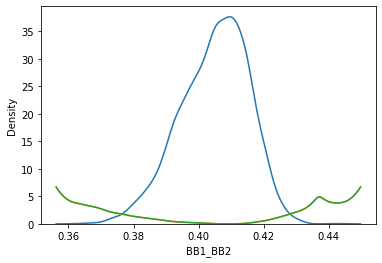

In [143]:
#get probability distribution from data
plt2 = sns.kdeplot(BB1_BB2_Hmapped_distance_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic_bond, xdata, U, p0=[0.44, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

In [ ]:
pd.DataFrame("data.xlsx")
martini2 = data["K_martini2"]
K_boltzmann = data["K_boltzmann"]

In [139]:
import numpy as np
np.corrcoef(martini2, K_boltzmann)

array([[1.        , 0.83980541],
       [0.83980541, 1.        ]])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB1_BB2_Hmapped_distance_all
Mean: Raw data 0.4048213429256595
Mode: Raw data 0.40934566753912793
Mode: Gauss-fitted 0.40785645157467076


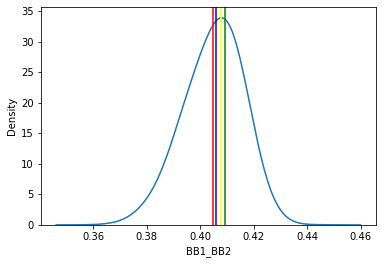

In [36]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB1_BB2_Hmapped_distance_all)
xmean = np.mean(BB1_BB2_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# #raw data plot
# plt = sns.distplot(BB1_BB2_Hmapped_distance_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB1_BB2_Hmapped_distance_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB1_BB2_Hmapped_distance_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB1_BB2_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


parameter R_o is:  0.4020316514408435
parameter K is:  5314.522491039684


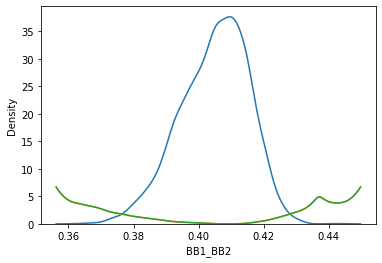

In [133]:
#get probability distribution from data
plt2 = sns.kdeplot(BB1_BB2_Hmapped_distance_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.44, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

In [145]:
U.shape

(200,)

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB2_BB3_Hmapped_distance_all
Mean: Raw data 0.24132074340527576
Mode: Raw data 0.24
Mode: Gauss-fitted 0.24074887532629147


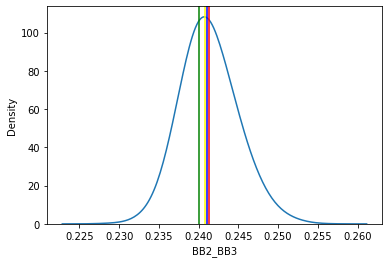

In [112]:

# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_Hmapped_distance_all)
xmean = np.mean(BB2_BB3_Hmapped_distance_all)
xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
# plt = sns.distplot(BB2_BB3_Hmapped_distance_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_Hmapped_distance_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_Hmapped_distance_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB2_BB3_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


parameter R_o is:  0.24183146049161625
parameter K is:  45035.170361539356


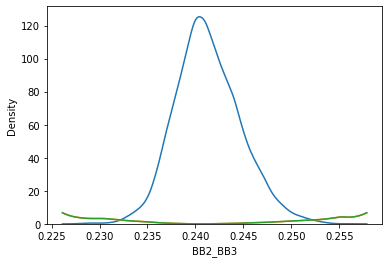

In [97]:
#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_Hmapped_distance_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.24, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

BB3_ASC1_Hmapped_distance_all
Mean: Raw data 0.34349580335731417
Mode: Raw data 0.34213183169396394
Mode: Gauss-fitted 0.3428132709907588


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


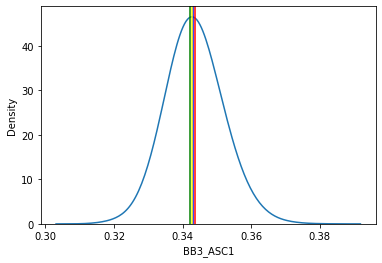

In [41]:

# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_ASC1_Hmapped_distance_all)
xmean = np.mean(BB3_ASC1_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(BB3_ASC1_Hmapped_distance_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_ASC1_Hmapped_distance_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_ASC1_Hmapped_distance_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB3_ASC1_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


parameter R_o is:  0.3456043853575343
parameter K is:  8115.639983519716


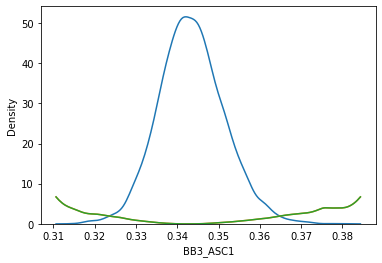

In [98]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_ASC1_Hmapped_distance_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.34, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_USC1_Hmapped_distance_all
Mean: Raw data 0.3302458033573142
Mode: Raw data 0.33032436779811936
Mode: Gauss-fitted 0.3300186262832858


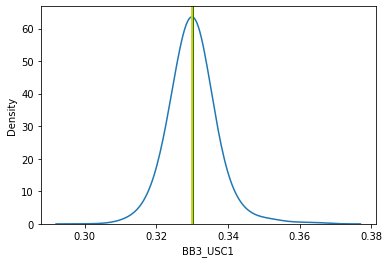

In [44]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_USC1_Hmapped_distance_all)
xmean = np.mean(BB3_USC1_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# #raw data plot
# plt = sns.distplot(BB3_USC1_Hmapped_distance_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_USC1_Hmapped_distance_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_USC1_Hmapped_distance_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB3_USC1_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  0.3344895797994285
parameter K is:  8640.496083772963


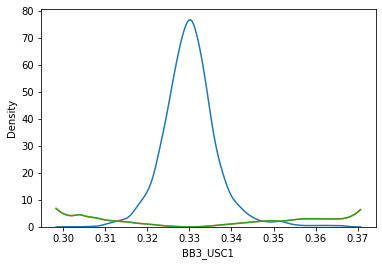

In [99]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_USC1_Hmapped_distance_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.325, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_GSC1_Hmapped_distance_all
Mean: Raw data 0.34404936051159074
Mode: Raw data 0.3444617610583156
Mode: Gauss-fitted 0.3443642403930035


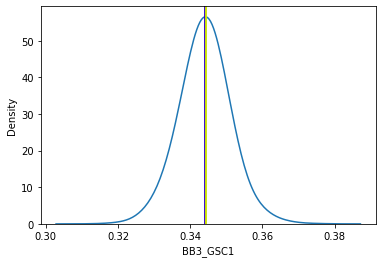

In [47]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_GSC1_Hmapped_distance_all)
xmean = np.mean(BB3_GSC1_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(BB3_GSC1_Hmapped_distance_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_GSC1_Hmapped_distance_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_GSC1_Hmapped_distance_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB3_GSC1_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  0.3448976954058929
parameter K is:  9281.599285001314


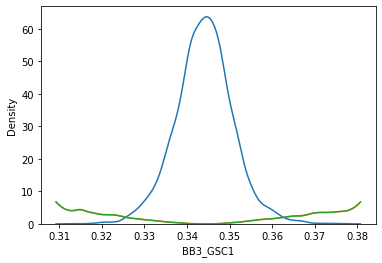

In [100]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_GSC1_Hmapped_distance_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.34, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_CSC1_Hmapped_distance_all
Mean: Raw data 0.3300407673860911
Mode: Raw data 0.330137547138366
Mode: Gauss-fitted 0.32983285417842784


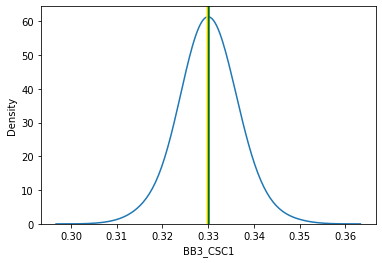

In [50]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_CSC1_Hmapped_distance_all)
xmean = np.mean(BB3_CSC1_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(BB3_CSC1_Hmapped_distance_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_CSC1_Hmapped_distance_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

# density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_CSC1_Hmapped_distance_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB3_CSC1_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  0.3302040688754675
parameter K is:  13790.05821750146


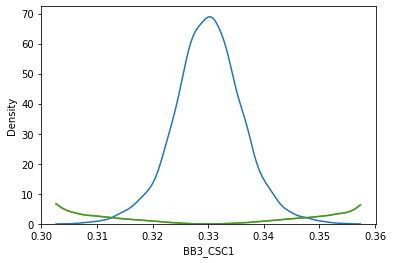

In [101]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_CSC1_Hmapped_distance_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.33, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC1_ASC2_Hmapped_distance_all
Mean: Raw data 0.2325093924860112
Mode: Raw data 0.23284723774335458
Mode: Gauss-fitted 0.2324982176162394


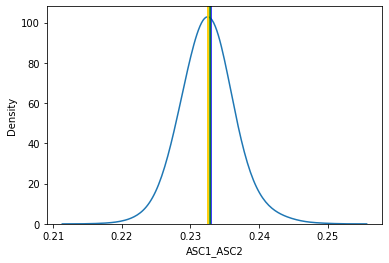

In [53]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC1_ASC2_Hmapped_distance_all)
xmean = np.mean(ASC1_ASC2_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(ASC1_ASC2_Hmapped_distance_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC1_ASC2_Hmapped_distance_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC1_ASC2_Hmapped_distance_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("ASC1_ASC2_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  0.23318341496323147
parameter K is:  31682.453720150894


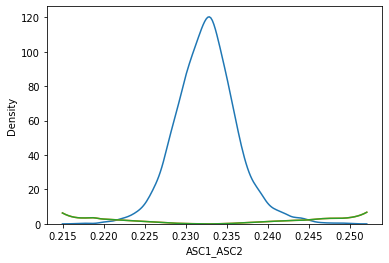

In [102]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC1_ASC2_Hmapped_distance_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.23, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


NameError: name 'xmode' is not defined

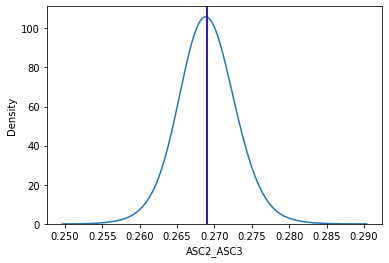

In [105]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC2_ASC3_Hmapped_distance_all)
xmean = np.mean(ASC2_ASC3_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(ASC2_ASC3_Hmapped_distance_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC2_ASC3_Hmapped_distance_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC2_ASC3_Hmapped_distance_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("ASC2_ASC3_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  0.26948654069892636
parameter K is:  37745.465840039906


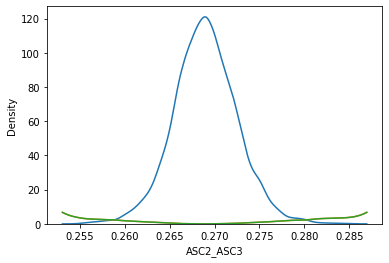

In [107]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC2_ASC3_Hmapped_distance_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.27, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC3_ASC4_Hmapped_distance_all
Mean: Raw data 0.2944446442845723
Mode: Raw data 0.29434427761317516
Mode: Gauss-fitted 0.29451554914975275


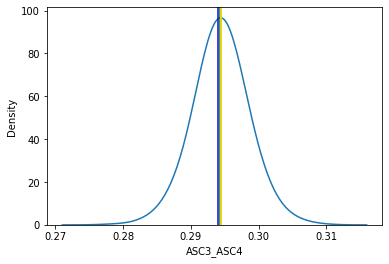

In [59]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC3_ASC4_Hmapped_distance_all)
xmean = np.mean(ASC3_ASC4_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(ASC3_ASC4_Hmapped_distance_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC3_ASC4_Hmapped_distance_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC3_ASC4_Hmapped_distance_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("ASC3_ASC4_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  0.2941658379434337
parameter K is:  29957.893820905534


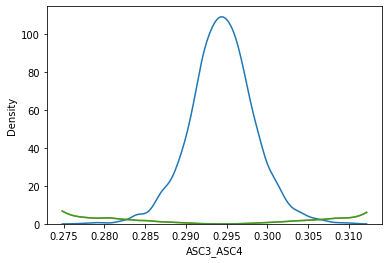

In [109]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC3_ASC4_Hmapped_distance_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.29, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC4_ASC1_Hmapped_distance_all
Mean: Raw data 0.16335471622701836
Mode: Raw data 0.1635620725540006
Mode: Gauss-fitted 0.16337415850609802


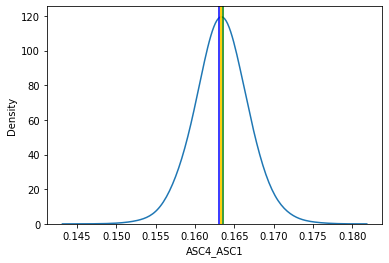

In [62]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC4_ASC1_Hmapped_distance_all)
xmean = np.mean(ASC4_ASC1_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# #raw data plot
# plt = sns.distplot(ASC4_ASC1_Hmapped_distance_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC4_ASC1_Hmapped_distance_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC4_ASC1_Hmapped_distance_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("ASC4_ASC1_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  0.16311662703664162
parameter K is:  43397.245037032306


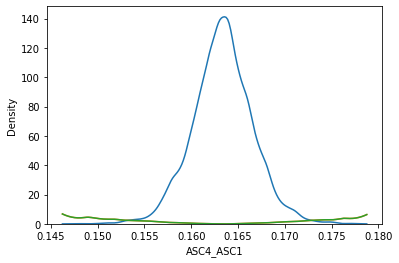

In [111]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC4_ASC1_Hmapped_distance_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.16, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC2_ASC4_Hmapped_distance_all
Mean: Raw data 0.3290011990407674
Mode: Raw data 0.3295656403635159
Mode: Gauss-fitted 0.32907158408236253


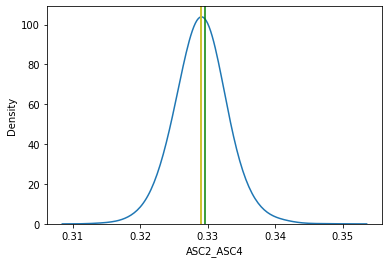

In [65]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC2_ASC4_Hmapped_distance_all)
xmean = np.mean(ASC2_ASC4_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(ASC2_ASC4_Hmapped_distance_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC2_ASC4_Hmapped_distance_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC2_ASC4_Hmapped_distance_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("ASC2_ASC4_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  0.32968767893201945
parameter K is:  30668.43961322965


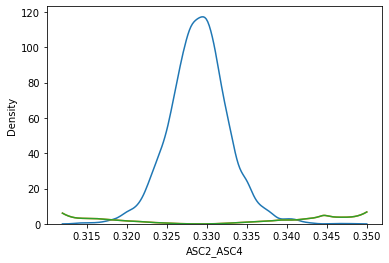

In [112]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC2_ASC4_Hmapped_distance_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.33, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC1_ASC3_Hmapped_distance_all
Mean: Raw data 0.3411994404476419
Mode: Raw data 0.340712527592328
Mode: Gauss-fitted 0.34125534886973624


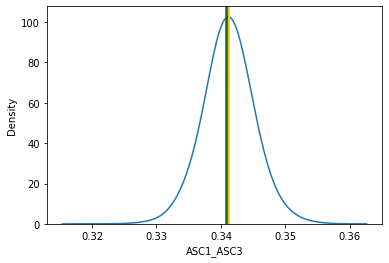

In [68]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC1_ASC3_Hmapped_distance_all)
xmean = np.mean(ASC1_ASC3_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(ASC1_ASC3_Hmapped_distance_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC1_ASC3_Hmapped_distance_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC1_ASC3_Hmapped_distance_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("ASC1_ASC3_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  0.3404761426989382
parameter K is:  29205.54156715453


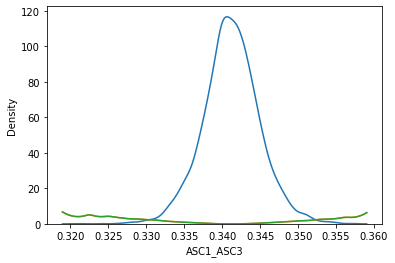

In [113]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC1_ASC3_Hmapped_distance_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.34, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


NameError: name 'xmode' is not defined

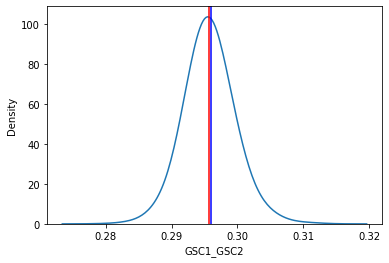

In [116]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC1_GSC2_Hmapped_distance_all)
xmean = np.mean(GSC1_GSC2_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# #raw data plot
# plt = sns.distplot(GSC1_GSC2_Hmapped_distance_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC1_GSC2_Hmapped_distance_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC1_GSC2_Hmapped_distance_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("GSC1_GSC2_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  0.2963204618526446
parameter K is:  29673.676685201182


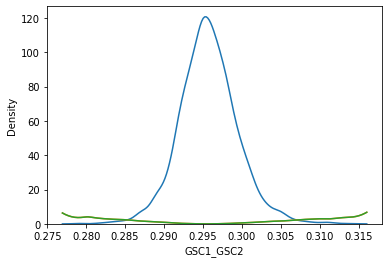

In [117]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC1_GSC2_Hmapped_distance_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.295, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC2_GSC3_Hmapped_distance_all
Mean: Raw data 0.29296083133493206
Mode: Raw data 0.29257402634701657
Mode: Gauss-fitted 0.2928976550566893


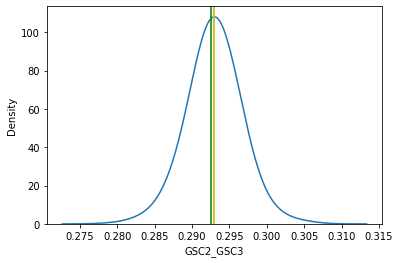

In [74]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC2_GSC3_Hmapped_distance_all)
xmean = np.mean(GSC2_GSC3_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# #raw data plot
# plt = sns.distplot(GSC2_GSC3_Hmapped_distance_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC3_Hmapped_distance_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC2_GSC3_Hmapped_distance_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("GSC2_GSC3_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


parameter R_o is:  0.29282636177243226
parameter K is:  36885.153242956


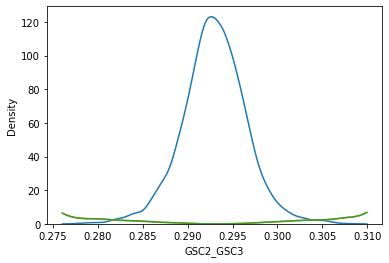

In [115]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC2_GSC3_Hmapped_distance_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.29, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC3_GSC4_Hmapped_distance_all
Mean: Raw data 0.2910169864108713
Mode: Raw data 0.29094296732823055
Mode: Gauss-fitted 0.29096745717601447


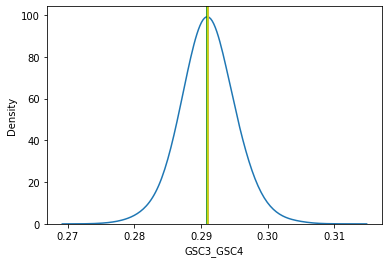

In [77]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC3_GSC4_Hmapped_distance_all)
xmean = np.mean(GSC3_GSC4_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(GSC3_GSC4_Hmapped_distance_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC3_GSC4_Hmapped_distance_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC3_GSC4_Hmapped_distance_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("GSC3_GSC4_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  0.2912205586877114
parameter K is:  31241.517507382698


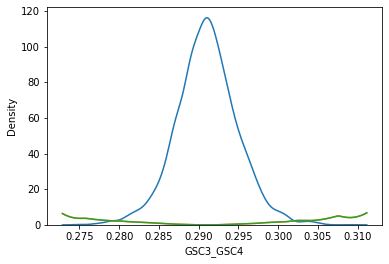

In [118]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC3_GSC4_Hmapped_distance_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.29, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC4_GSC1_Hmapped_distance_all
Mean: Raw data 0.16338349320543563
Mode: Raw data 0.16323759625234563
Mode: Gauss-fitted 0.1632839591078357


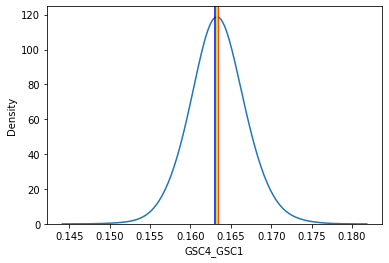

In [117]:

# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC4_GSC1_Hmapped_distance_all)
xmean = np.mean(GSC4_GSC1_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# #raw data plot
# plt = sns.distplot(GSC4_GSC1_Hmapped_distance_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

# histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC4_GSC1_Hmapped_distance_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

# density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC4_GSC1_Hmapped_distance_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("GSC4_GSC1_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  0.16337324929463085
parameter K is:  44528.95431376261


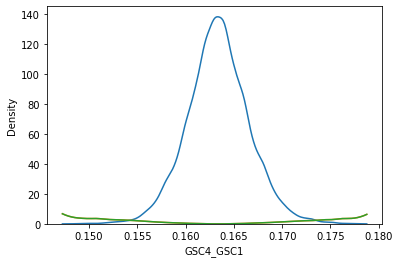

In [119]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC4_GSC1_Hmapped_distance_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.16, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC2_GSC4_Hmapped_distance_all
Mean: Raw data 0.3898233413269384
Mode: Raw data 0.38941470531892447
Mode: Gauss-fitted 0.38964128354847316


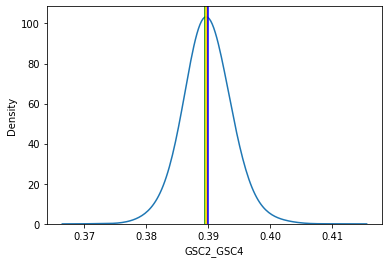

In [119]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC2_GSC4_Hmapped_distance_all)
xmean = np.mean(GSC2_GSC4_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(GSC2_GSC4_Hmapped_distance_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC4_Hmapped_distance_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC2_GSC4_Hmapped_distance_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("GSC2_GSC4_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


parameter R_o is:  0.39037502320800743
parameter K is:  29429.928771233197


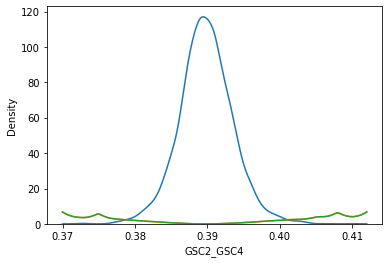

In [120]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC2_GSC4_Hmapped_distance_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.39, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC1_GSC3_Hmapped_distance_all
Mean: Raw data 0.33976938449240607
Mode: Raw data 0.3398473002948683
Mode: Gauss-fitted 0.3397210077427819


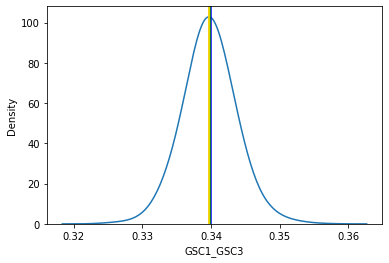

In [89]:


# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC1_GSC3_Hmapped_distance_all)
xmean = np.mean(GSC1_GSC3_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# #raw data plot
# plt = sns.distplot(GSC1_GSC3_Hmapped_distance_all, kde=True, 
# #             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC1_GSC3_Hmapped_distance_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

# density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC1_GSC3_Hmapped_distance_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("GSC1_GSC3_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  0.3402575238690159
parameter K is:  31683.535497199697


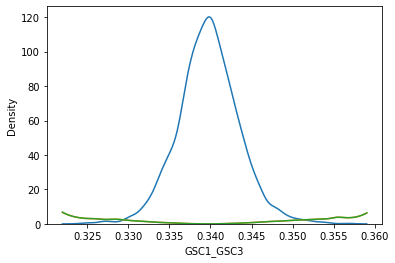

In [122]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC1_GSC3_Hmapped_distance_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.34, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

CSC1_CSC2_Hmapped_distance_all
Mean: Raw data 0.22383473221422862
Mode: Raw data 0.22436482458741602
Mode: Gauss-fitted 0.22373545219930974


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


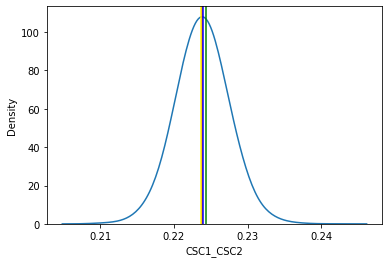

In [95]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(CSC1_CSC2_Hmapped_distance_all)
xmean = np.mean(CSC1_CSC2_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
# plt = sns.distplot(CSC1_CSC2_Hmapped_distance_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(CSC1_CSC2_Hmapped_distance_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(CSC1_CSC2_Hmapped_distance_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("CSC1_CSC2_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


parameter R_o is:  0.22408192618219017
parameter K is:  37886.916160987545


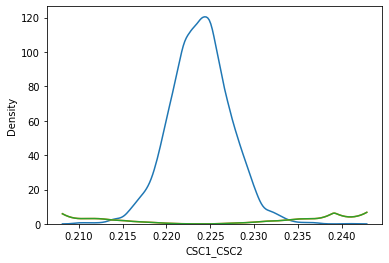

In [123]:
#get probability distribution from data
plt2 = sns.kdeplot(CSC1_CSC2_Hmapped_distance_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.23, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.6 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


CSC2_CSC3_Hmapped_distance_all
Mean: Raw data 0.28588349320543566
Mode: Raw data 0.28673673554604373
Mode: Gauss-fitted 0.28604884965053884


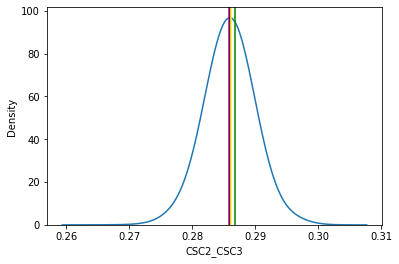

In [99]:

# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(CSC2_CSC3_Hmapped_distance_all)
xmean = np.mean(CSC2_CSC3_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(CSC2_CSC3_Hmapped_distance_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(CSC2_CSC3_Hmapped_distance_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(CSC2_CSC3_Hmapped_distance_all,bw=0.6)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("CSC2_CSC3_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  0.28495224045027884
parameter K is:  31663.1219507746


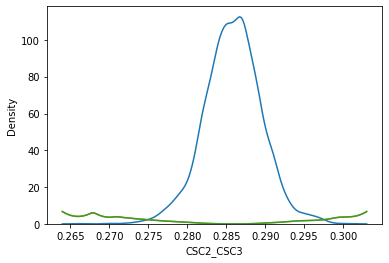

In [125]:
#get probability distribution from data
plt2 = sns.kdeplot(CSC2_CSC3_Hmapped_distance_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.285, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


CSC3_CSC1_Hmapped_distance_all
Mean: Raw data 0.2676043165467626
Mode: Raw data 0.26701037592074023
Mode: Gauss-fitted 0.2675583182057936


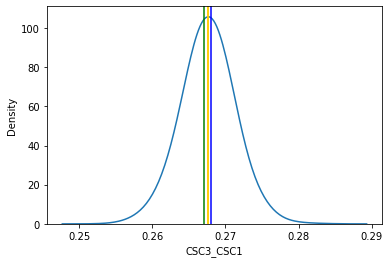

In [102]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(CSC3_CSC1_Hmapped_distance_all)
xmean = np.mean(CSC3_CSC1_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(CSC3_CSC1_Hmapped_distance_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(CSC3_CSC1_Hmapped_distance_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(CSC3_CSC1_Hmapped_distance_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("CSC3_CSC1_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  0.26823828076268463
parameter K is:  36768.66808590857


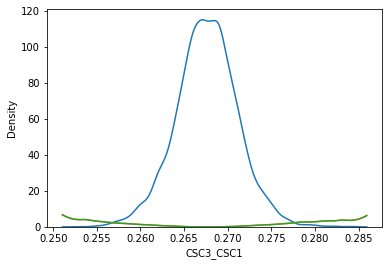

In [127]:
#get probability distribution from data
plt2 = sns.kdeplot(CSC3_CSC1_Hmapped_distance_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.27, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


USC1_USC2_Hmapped_distance_all
Mean: Raw data 0.22125619504396482
Mode: Raw data 0.22158513676813643
Mode: Gauss-fitted 0.22113227806782362


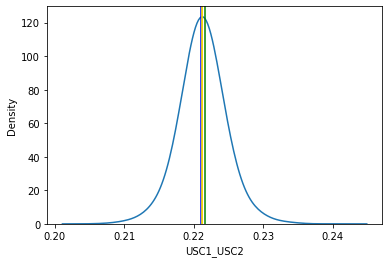

In [105]:


# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(USC1_USC2_Hmapped_distance_all)
xmean = np.mean(USC1_USC2_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(USC1_USC2_Hmapped_distance_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(USC1_USC2_Hmapped_distance_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(USC1_USC2_Hmapped_distance_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("USC1_USC2_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


parameter R_o is:  0.22154083644526348
parameter K is:  37640.34361285621


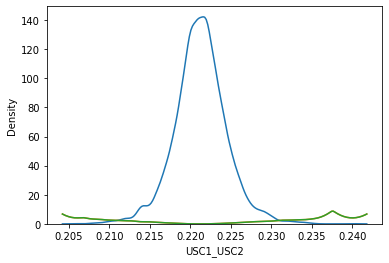

In [129]:
#get probability distribution from data
plt2 = sns.kdeplot(USC1_USC2_Hmapped_distance_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.22, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


USC2_USC3_Hmapped_distance_all
Mean: Raw data 0.2688257394084732
Mode: Raw data 0.2689102906111024
Mode: Gauss-fitted 0.26889403210346197


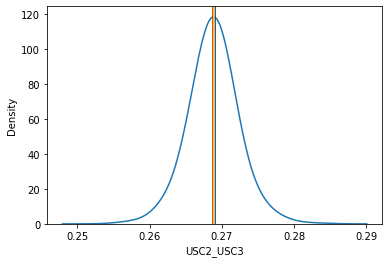

In [108]:

# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(USC2_USC3_Hmapped_distance_all)
xmean = np.mean(USC2_USC3_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(USC2_USC3_Hmapped_distance_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(USC2_USC3_Hmapped_distance_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(USC2_USC3_Hmapped_distance_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("USC2_USC3_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


parameter R_o is:  0.2692661724562798
parameter K is:  35433.86958889927


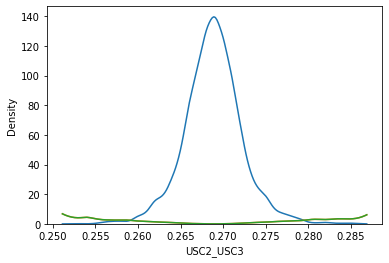

In [131]:
#get probability distribution from data
plt2 = sns.kdeplot(USC2_USC3_Hmapped_distance_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.27, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


USC3_USC1_Hmapped_distance_all
Mean: Raw data 0.20963689048760994
Mode: Raw data 0.20992478841498663
Mode: Gauss-fitted 0.2096948206023787


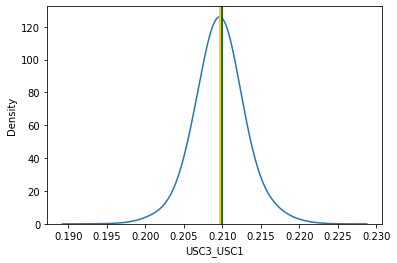

In [111]:

# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(USC3_USC1_Hmapped_distance_all)
xmean = np.mean(USC3_USC1_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# #raw data plot
# plt = sns.distplot(USC3_USC1_Hmapped_distance_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(USC3_USC1_Hmapped_distance_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(USC3_USC1_Hmapped_distance_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("USC3_USC1_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  0.20938897599631814
parameter K is:  42459.0882519572


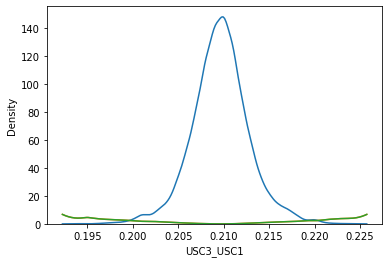

In [132]:
#get probability distribution from data
plt2 = sns.kdeplot(USC3_USC1_Hmapped_distance_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.21, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])